# Baseline Model with Kaggle data: 5 epochs and 100x100 resolution

In [2]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

## 1. Look at data

In [3]:
train_dir = '/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/train/'
test_dir = '/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/test/'
val_dir = '/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/valid/'

In [4]:
data_dir = pathlib.Path("/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'ALBATROSS'
 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'AUCKLAND SHAQ' 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT'
 'AZARAS SPINETAIL' 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER'
 'AZURE TIT' 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING'
 'BALTIMORE ORIOLE' 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BROADBILL'
 'BAN

In [5]:
def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


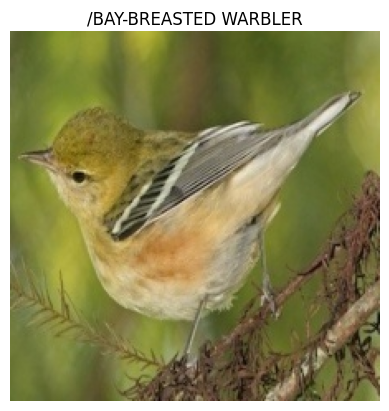

In [6]:
img = view_random_image(target_dir = train_dir,
                        target_class = '/BAY-BREASTED WARBLER'
                        ) # or we can write nike instead of converse to see converse examples

In [7]:
img.shape #(width, height, colour channels)

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


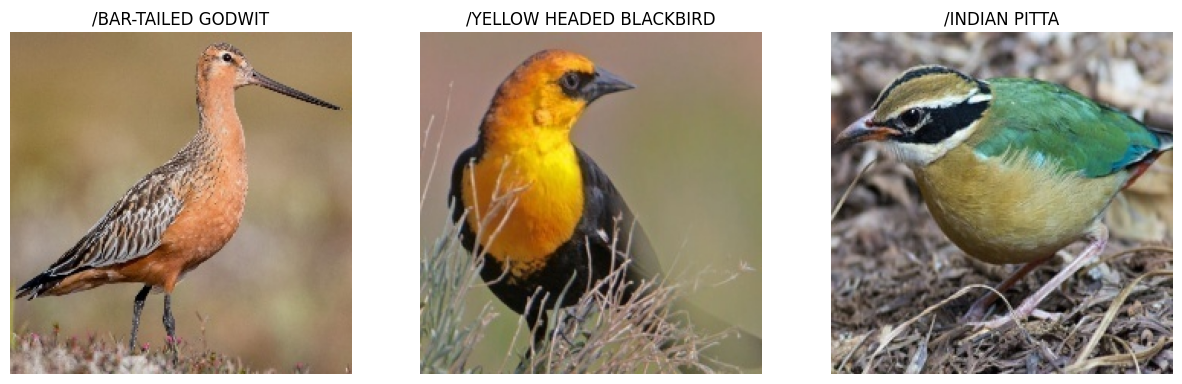

In [8]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image(train_dir, "/BAR-TAILED GODWIT")
plt.subplot(1,3,2)
pizza_image = view_random_image(train_dir, "/YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image(train_dir, "/INDIAN PITTA")

## 2. Data Preprocessing

In [9]:
img_height = 100
img_width = 100

In [10]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (img_height,img_width),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (img_height,img_width),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (img_height,img_width),
                                               class_mode = "categorical")


Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


## 3.Creating and fitting the Model

In [11]:
# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(img_height,img_width,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = "softmax", name = "output-layer")(x)

2022-10-26 19:58:42.174421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-26 19:58:42.174731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Shape after passing inputs through base model: (None, 1, 1, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)


In [12]:
# 8. Combine the inputs with outputs into a model
model_p100_e5 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_p100_e5.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
                metrics = ["accuracy"])


In [13]:
history = model_p100_e5.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

Epoch 1/5


2022-10-26 19:58:46.999905: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-26 19:58:51.325904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - ETA: 0s - loss: 84.1614 - accuracy: 0.2178

2022-10-26 20:03:11.100571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - 267s 117ms/step - loss: 84.1614 - accuracy: 0.2178 - val_loss: 70.3681 - val_accuracy: 0.3750
Epoch 2/5
2208/2208 [==============================] - 307s 139ms/step - loss: 70.0819 - accuracy: 0.3813 - val_loss: 83.0785 - val_accuracy: 0.4007
Epoch 3/5
2208/2208 [==============================] - 308s 139ms/step - loss: 61.5627 - accuracy: 0.4581 - val_loss: 83.7138 - val_accuracy: 0.4173
Epoch 4/5
2208/2208 [==============================] - 577s 261ms/step - loss: 54.0001 - accuracy: 0.5160 - val_loss: 80.8060 - val_accuracy: 0.4908
Epoch 5/5
2208/2208 [==============================] - 201s 91ms/step - loss: 48.5463 - accuracy: 0.5577 - val_loss: 93.6597 - val_accuracy: 0.4559


Runtime info: One epoch with the res takes roughly 4-5 minutes - total runtime:27 minutes

In [14]:
model_p100_e5.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 450)               922050    
                                                                 
Total params: 22,724,834
Trainable params: 922,050
Non-trainable params: 21,802,784
_________________________________________________________________


In [15]:
model_p100_e5.evaluate(test_data)

71/71 [==============================] - 5s 74ms/step - loss: 88.3874 - accuracy: 0.4529


[88.3873519897461, 0.4528889060020447]

In [16]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

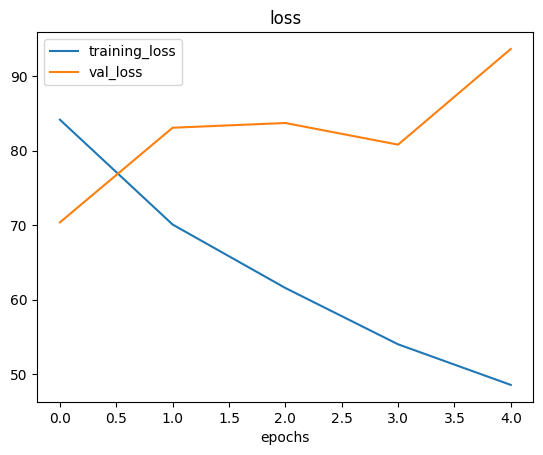

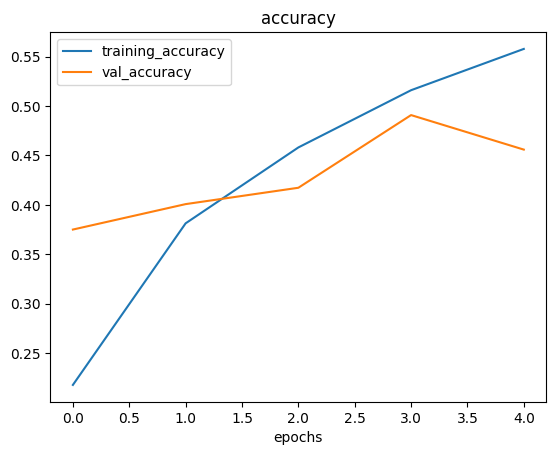

In [17]:
plot_loss_curves(history)

## 4. Freeze top layers of Base Model

In [18]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable
base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_p100_e5.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )


In [19]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_p100_e5.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [20]:
# Now we have unfrozen some of the layers on the top 
print(len(model_p100_e5.trainable_variables))

3


## 5. Fine-Tuning and Refitting

In [21]:
initial_epochs = 5
fine_tune_epochs = initial_epochs + 1

# Refit the model
history_2 = model_p100_e5.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 5/6


2022-10-26 20:26:37.796393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - ETA: 0s - loss: 16.9367 - accuracy: 0.7243

2022-10-26 20:28:48.391778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - 136s 58ms/step - loss: 16.9367 - accuracy: 0.7243 - val_loss: 48.6219 - val_accuracy: 0.5515
Epoch 6/6
2208/2208 [==============================] - 138s 62ms/step - loss: 11.4065 - accuracy: 0.7759 - val_loss: 52.5223 - val_accuracy: 0.5257


In [22]:
model_p100_e5.evaluate(test_data)

71/71 [==============================] - 5s 75ms/step - loss: 52.9584 - accuracy: 0.5471


[52.958412170410156, 0.5471110939979553]

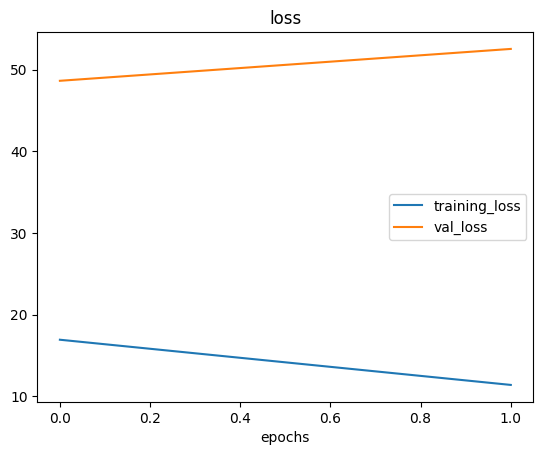

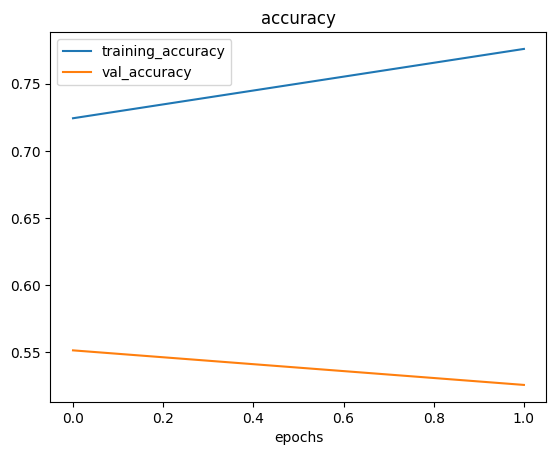

In [23]:
plot_loss_curves(history_2)

In [24]:
# Save the entire small model as a SavedModel.
!mkdir -p saved_model
model_p100_e5.save('saved_model/model_p100_e5')

2022-10-26 20:31:21.827443: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/model_p100_e5/assets


INFO:tensorflow:Assets written to: saved_model/model_p100_e5/assets


## 6. Making some predictions

In [25]:
# reminder: 
# img_height = 200
# img_width = 200

In [26]:
# cReating a function that preprocess the custom data

def load_and_prep_image(filename, img_shape = img_height):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_height, img_width]) # resize the image
  img = img/255. # rescale the image
  return img

In [27]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Add new files to the test folder 

In [28]:
amsel = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Amsel.jpeg"
blaumeise = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/blaumeise.jpeg"
buchfink = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/buchfink.jpeg"
elster = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/elster.jpeg"
feldsperling = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/feldsperling.jpeg"
firefinch = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/firefinch.jpg"
gruenfink = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/grünfink.jpeg"
haussperling = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/haussperling.jpeg"
kohlmeise = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Kohlmeise.jpeg"
mauersegler = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/mauersegler.jpeg"
mehlschwalbe = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/mehlschwalbe.jpeg"
rotkehlchen = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Rotkehlchen.jpeg"
star = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Star.jpeg"

2022-10-26 20:31:43.069071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


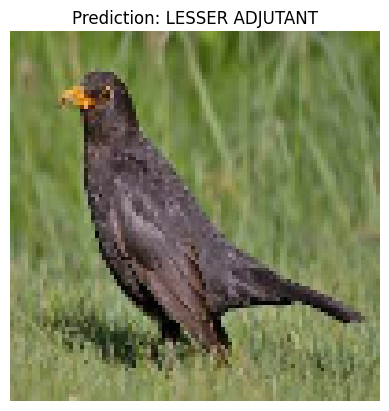

In [29]:
pred_and_plot(model_p100_e5, amsel, class_names)